In [24]:
import os
import pandas as pd
import numpy as np
import random
from typing import Dict, Any, Tuple, List, Union

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pylab as plt
import seaborn as sns
import joblib
import mlflow
import mlflow.tensorflow
import json

In [25]:
data = pd.read_csv('Heart_disease_cleveland_new.csv')
data.rename(columns = {'condition':'target'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
categorys= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

encoder = OneHotEncoder()
encoder.fit(data[categorys])

joblib.dump(encoder, 'encoder.pkl')

encoded_data = encoder.transform(data[categorys])

encoded_columns = encoder.get_feature_names_out(categorys)

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)

data_without_categories = data.drop(columns=categorys)

final_data = pd.concat([data_without_categories, encoded_df], axis=1)

data = final_data
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,67,160,286,108,1.5,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,67,120,229,129,2.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37,130,250,187,3.5,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,41,130,204,172,1.4,0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,1,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
299,68,144,193,141,3.4,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,57,130,131,115,1.2,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
301,57,130,236,174,0.0,1,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [87]:
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,False,True,True,False,...,False,False,True,True,False,False,False,False,True,False
1,67,160,286,108,1.5,1,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
2,67,120,229,129,2.6,1,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,37,130,250,187,3.5,0,False,True,False,False,...,False,False,True,True,False,False,False,True,False,False
4,41,130,204,172,1.4,0,True,False,False,True,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,1,False,True,True,False,...,False,True,False,True,False,False,False,False,False,True
299,68,144,193,141,3.4,1,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
300,57,130,131,115,1.2,1,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
301,57,130,236,174,0.0,1,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_0      303 non-null    bool   
 7   sex_1      303 non-null    bool   
 8   cp_0       303 non-null    bool   
 9   cp_1       303 non-null    bool   
 10  cp_2       303 non-null    bool   
 11  cp_3       303 non-null    bool   
 12  fbs_0      303 non-null    bool   
 13  fbs_1      303 non-null    bool   
 14  restecg_0  303 non-null    bool   
 15  restecg_1  303 non-null    bool   
 16  restecg_2  303 non-null    bool   
 17  exang_0    303 non-null    bool   
 18  exang_1    303 non-null    bool   
 19  slope_0    303 non-null    bool   
 20  slope_1   

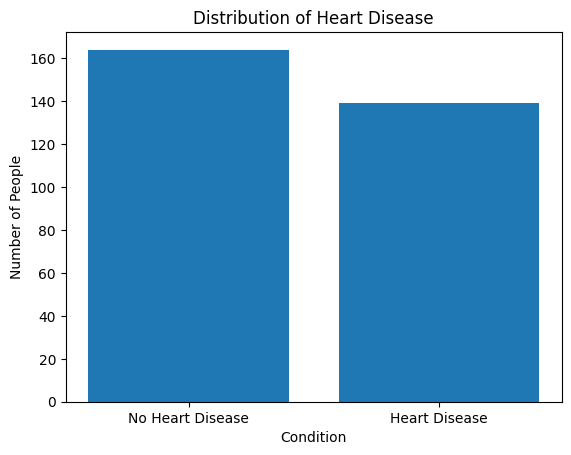

In [89]:
counts = data['target'].value_counts()

plt.bar(['No Heart Disease', 'Heart Disease'], counts.values)
plt.xlabel('Condition')
plt.ylabel('Number of People')
plt.title('Distribution of Heart Disease')
plt.show()

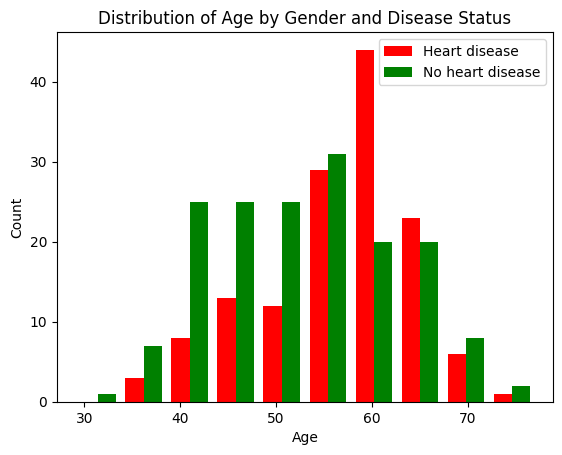

In [90]:
sick = data[data['target'] == 1]
healthy = data[data['target'] == 0]

plt.hist([sick['age'], healthy['age']], bins=10, color=['red', 'green'], label=['Heart disease', 'No heart disease'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Gender and Disease Status')
plt.legend()
plt.show()

In [91]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.458746
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.499120
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


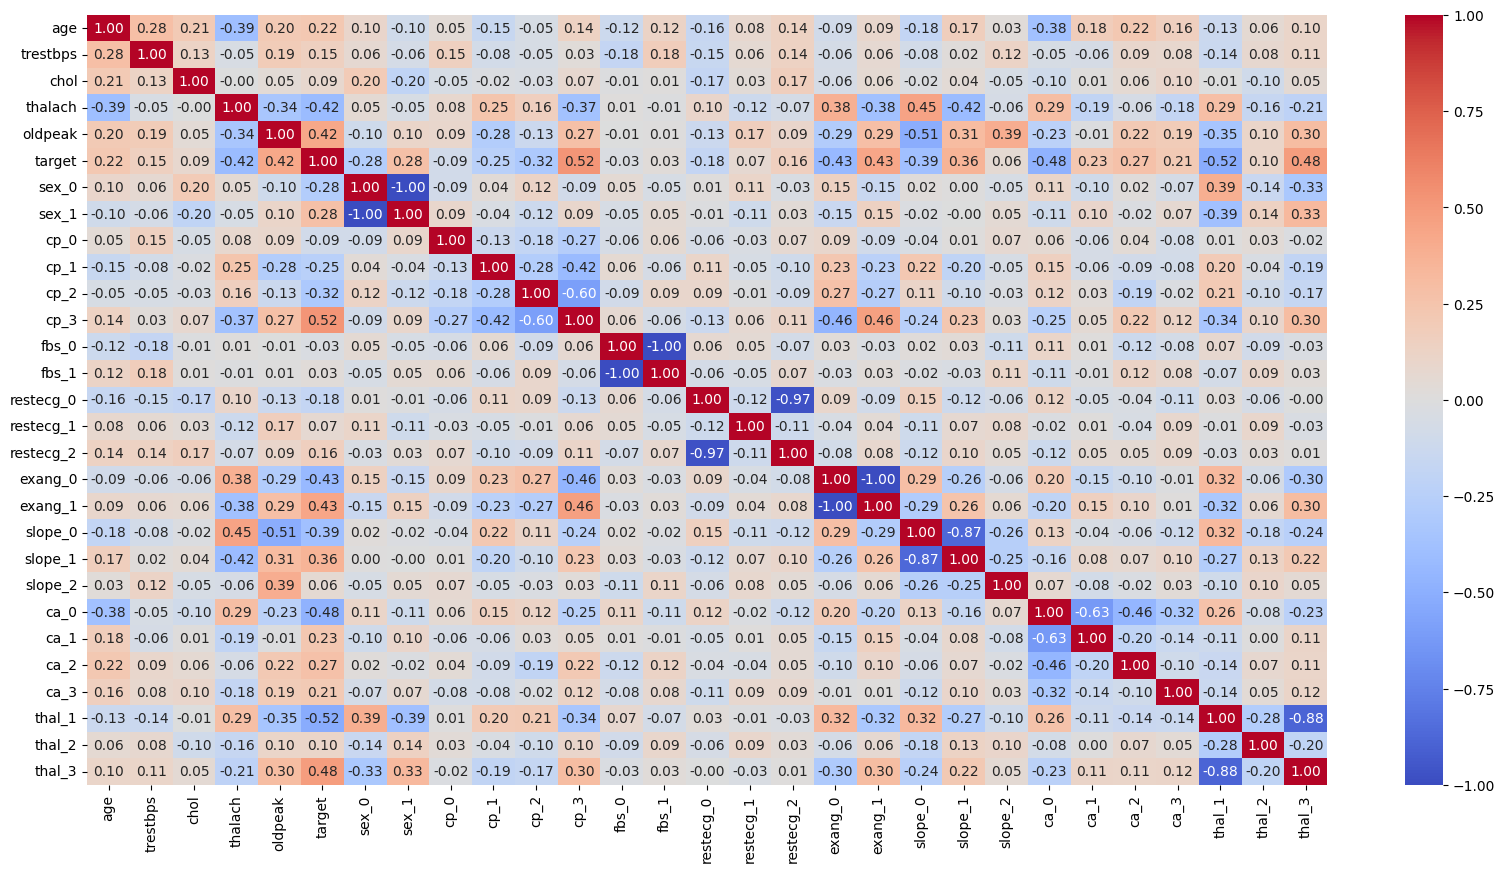

In [92]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [93]:
target_index = data.columns.get_loc('target')

columns_after_target = data.columns[target_index+1:]

columns_after_target

Index(['sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [94]:
# Вибір числових ознак для стандартизації
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Вибір категоріальних ознак
categorical_columns = columns_after_target.values

# Стандартизація лише числових ознак
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[numeric_columns])

# Перетворення змасштабованих даних у DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

# Додавання категоріальних ознак до DataFrame
for column in categorical_columns:
    X_scaled_df[column] = data[column]

X_scaled_df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,False,True,True,False,False,...,False,False,True,True,False,False,False,False,True,False
1,0.791667,0.622642,0.365297,0.282443,0.241935,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0.791667,0.245283,0.235160,0.442748,0.419355,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,0.166667,0.339623,0.283105,0.885496,0.564516,False,True,False,False,True,...,False,False,True,True,False,False,False,True,False,False
4,0.250000,0.339623,0.178082,0.770992,0.225806,True,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,0.150943,0.315068,0.465649,0.193548,False,True,True,False,False,...,False,True,False,True,False,False,False,False,False,True
299,0.812500,0.471698,0.152968,0.534351,0.548387,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
300,0.583333,0.339623,0.011416,0.335878,0.193548,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,0.583333,0.339623,0.251142,0.786260,0.000000,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [108]:
X, y = X_scaled_df, data['target']
X_train, X_test, y_train, y_test = train_test_split(X.astype(float), y, test_size=0.2, random_state=42)

In [109]:
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.to_numpy() if isinstance(y_train, pd.DataFrame) else y_train
y_test = y_test.to_numpy() if isinstance(y_test, pd.DataFrame) else y_test

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(28,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 64)                1856      
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                                 
 dense_65 (Dense)            (None, 64)                4160      
                                                                 
 dense_66 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10241 (40.00 KB)
Trainable params: 10241 (40.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\users\legion\pycharmprojects\lab_iad1\venv\lib\site-packages\mlflow\data\dataset_source_registry.py:150: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci'. Exception: 
  return _dataset_source_registry.resolve(
c:\users\legion\pycharmprojects\lab_iad1\venv\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlf

Epoch 1/10
 1/16 [>.............................] - ETA: 19s - loss: 0.7151 - accuracy: 0.3750WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0026s vs `on_train_batch_end` time: 0.0043s). Check your callbacks.


16/16 [==============================] - 2s 27ms/step - loss: 0.6177 - accuracy: 0.7521 - val_loss: 0.5082 - val_accuracy: 0.8525
Epoch 2/10
15/16 [===========================>..] - ETA: 0s - loss: 0.4590 - accuracy: 0.8167

c:\users\legion\pycharmprojects\lab_iad1\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 13ms/step - loss: 0.4595 - accuracy: 0.8182 - val_loss: 0.3665 - val_accuracy: 0.8361
Epoch 3/10
16/16 [==============================] - 0s 13ms/step - loss: 0.3751 - accuracy: 0.8430 - val_loss: 0.3167 - val_accuracy: 0.8852
Epoch 4/10
16/16 [==============================] - 0s 16ms/step - loss: 0.3485 - accuracy: 0.8430 - val_loss: 0.3130 - val_accuracy: 0.8689
Epoch 5/10
16/16 [==============================] - 0s 16ms/step - loss: 0.3383 - accuracy: 0.8678 - val_loss: 0.3052 - val_accuracy: 0.8689
Epoch 6/10
16/16 [==============================] - 0s 16ms/step - loss: 0.3179 - accuracy: 0.8719 - val_loss: 0.3015 - val_accuracy: 0.8689
Epoch 7/10
16/16 [==============================] - 0s 9ms/step - loss: 0.3065 - accuracy: 0.8843 - val_loss: 0.3116 - val_accuracy: 0.8852
Epoch 8/10
16/16 [==============================] - 0s 14ms/step - loss: 0.2963 - accuracy: 0.8760 - val_loss: 0.3025 - val_accuracy: 0.8689
Epoch 9/10
16/16 [=======

INFO:tensorflow:Assets written to: C:\Users\Legion\AppData\Local\Temp\tmp1_azz0zj\model\data\model\assets


8/8 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.8967
Test loss: 0.3062498867511749, Test accuracy: 0.8852459192276001
Train loss: 0.27374696731567383, Train accuracy: 0.8966942429542542
2/2 [==============================] - 0s 5ms/step
Classification Report:
{'0': {'precision': 0.8928571428571429, 'recall': 0.8620689655172413, 'f1-score': 0.8771929824561403, 'support': 29.0}, '1': {'precision': 0.8787878787878788, 'recall': 0.90625, 'f1-score': 0.8923076923076924, 'support': 32.0}, 'accuracy': 0.8852459016393442, 'macro avg': {'precision': 0.8858225108225108, 'recall': 0.8841594827586207, 'f1-score': 0.8847503373819163, 'support': 61.0}, 'weighted avg': {'precision': 0.8854765453126109, 'recall': 0.8852459016393442, 'f1-score': 0.8851220105749872, 'support': 61.0}}
Confusion Matrix:
[[25  4]
 [ 3 29]]


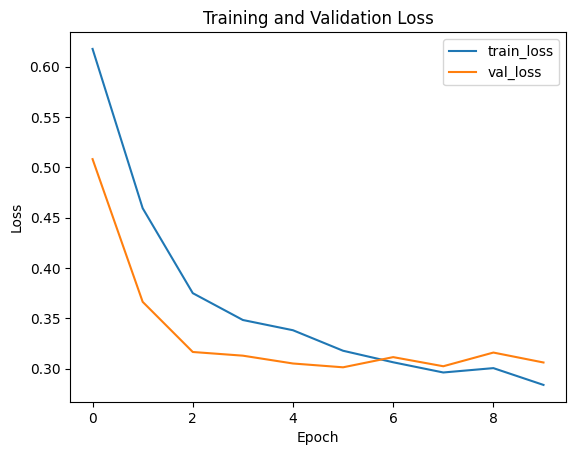

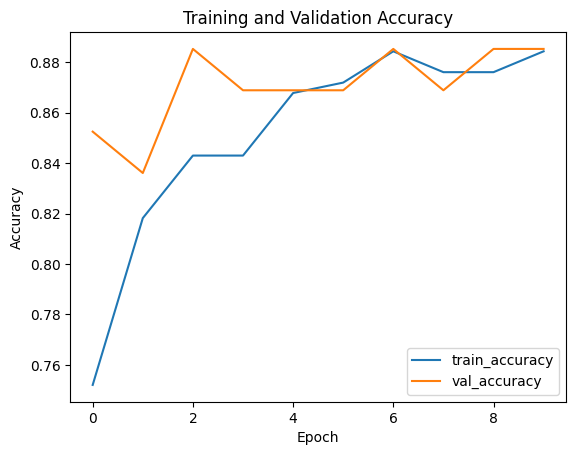

In [117]:
with mlflow.start_run() as run:
    # Enable auto-logging to MLflow to capture model parameters, metrics, and artifacts
    mlflow.tensorflow.autolog()

    dataset_train = mlflow.data.from_pandas(
        data, source='https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci', name="heart-disease-cleveland-uci", targets="target"
    )
    mlflow.log_input(dataset_train)

    history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

    loss, accuracy = model.evaluate(X_test, y_test)
    loss_1, accuracy_1 = model.evaluate(X_train, y_train)
    
    print(f'Test loss: {loss}, Test accuracy: {accuracy}')
    print(f'Train loss: {loss_1}, Train accuracy: {accuracy_1}')

    mlflow.log_metric('test_loss', loss)
    mlflow.log_metric('test_accuracy', accuracy)
    mlflow.log_metric('train_loss', loss_1)
    mlflow.log_metric('train_accuracy', accuracy_1)

    predictions = (model.predict(X_test) > 0.5).astype("int32")

    print("Classification Report:")
    report = classification_report(y_test, predictions, output_dict=True)
    print(report)
    
    print("Confusion Matrix:")
    matrix = confusion_matrix(y_test, predictions)
    print(matrix)

    with open("classification_report.json", "w") as f:
        json.dump(report, f)
    mlflow.log_artifact("classification_report.json")

    with open("confusion_matrix.csv", "w") as f:
        np.savetxt(f, matrix, delimiter=",")
    mlflow.log_artifact("confusion_matrix.csv")

    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss_curve.png')
    mlflow.log_artifact('loss_curve.png')

    plt.figure()
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy_curve.png')
    mlflow.log_artifact('accuracy_curve.png')

In [118]:
mlflow.end_run()

In [119]:
!mlflow server --host 127.0.0.1 --port 8080

^C


In [17]:
mlflow.set_tag("Dataset", 'Heart_disease_cleveland_new')

In [121]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

INFO:waitress:Serving on http://127.0.0.1:8080
INFO:waitress:Serving on http://127.0.0.1:8080
INFO:waitress:Serving on http://127.0.0.1:8080
INFO:waitress:Serving on http://127.0.0.1:8080
INFO:waitress:Serving on http://127.0.0.1:8080
INFO:waitress:Serving on http://127.0.0.1:8080
